# SI 670: Applied Machine Learning. Assignment 4 - Deep Learning

In this assignment, we'll build a simple CNN to detect a *smile* in an image.

In [63]:
from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import layers
from keras import models
import numpy as np

model = Sequential()

#--Layer 1: The first layer is a convolutional layer. Use Conv2D with 32 filters(or feature detectors), 
#--where feature detectors determine num of features like lines, edges, etc. that the network could learn
#--ea filter generates a feature map, which allows you to learn the explanatory factors in the image
#--kernel size (3,3) and relu as activation.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1))) 
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #--Layer 2: Conv2D
model.add(layers.MaxPooling2D((2, 2))) #--Layer 3: MaxPooling2D
model.add(layers.Dropout(0.25)) #--Layer 4: Dropout layer

model.add(layers.Flatten()) #--Layer 5: Flatten
model.add(layers.Dense(128, activation='relu')) #--Layer 6: Dense layer
model.add(layers.Dropout(0.5)) #--Layer 7: Dropout layer
model.add(layers.Dense(2, activation='softmax'))


#
# enter the appropriate Keras layers here based on the description above.
#

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               802944    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [64]:
X = np.load('X.npy') #--main dataset
y = np.load('y.npy') #--labels

In [65]:
#--COUNT UNIQUE VALUES to determine class weights--
m = y.tolist()

In [66]:
from collections import Counter
class_lst = []
for lst in m:
    class_lst.append(lst[0])
n = Counter(class_lst)
n

Counter({1.0: 9475, 0.0: 3690})

In [67]:
#--Find class weights--
a = round(9475/13165, 3)
b = round(3690/13165, 3)

print('class 1:{}, class 0:{}'.format(a, b))

class 1:0.72, class 0:0.28


In [68]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(class_lst),
                                                 class_lst)
class_weights

array([1.78387534, 0.69472296])

In [69]:
import numpy as np
from keras.applications import VGG16
from keras import backend as K

#--load the data: data looks to have been put into tensor format and scaled--
X = np.load('X.npy') #--main dataset
y = np.load('y.npy') #--labels

#--Split data and labels into train, validation, test--
x_test = X[:1316] #--test data
# x_test = xnpy[1316:2632]
# x_train = xnpy[2632:]
x_train = X[1316:] #--training data

y_test = y[:1316] #--test labels
# y_test = ynpy[1316:2632]
# y_train = ynpy[2632:]
y_train = y[1316:] #--training labels

#--Set class weight, since they're unbalanced--
#--COUNT UNIQUE VALUES to determine class weights--
class_weights = {0: 1/.28,
                1: 1/.72}


#--Compile the code--
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#--Fit the model--
history = model.fit(X, y, epochs=5, batch_size=128, verbose=1, 
                    validation_split=0.1, class_weight=class_weights)
history

Train on 11848 samples, validate on 1317 samples
Epoch 1/5
11848/11848 [==============================] - 13s 1ms/step - loss: 0.9798 - acc: 0.7150 - val_loss: 0.6940 - val_acc: 0.7206
Epoch 2/5
11848/11848 [==============================] - 11s 942us/step - loss: 0.6912 - acc: 0.7854 - val_loss: 0.6481 - val_acc: 0.8125
Epoch 3/5
11848/11848 [==============================] - 11s 960us/step - loss: 0.6345 - acc: 0.8393 - val_loss: 0.6007 - val_acc: 0.8656
Epoch 4/5
11848/11848 [==============================] - 11s 939us/step - loss: 0.5880 - acc: 0.8666 - val_loss: 0.5904 - val_acc: 0.8891
Epoch 5/5
11848/11848 [==============================] - 11s 943us/step - loss: 0.5547 - acc: 0.8824 - val_loss: 0.5830 - val_acc: 0.8474


In [70]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1316/1316 [==============================] - 0s 282us/step


In [71]:
test_acc

0.8503039513677811

Part 3. (20 points) Use the history data in model to see the accuracy and loss curves (in a single figure) for both training and validation data. https://keras.io/visualization/#training-history-visualization

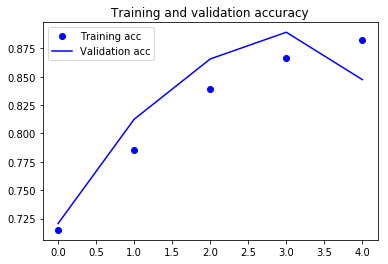

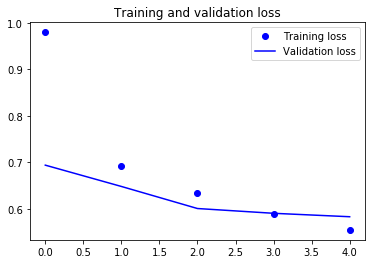

In [72]:
%matplotlib inline
from matplotlib import pyplot as plt

# add code here to visualize the accuracy and loss curves for both training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Part 4. (10 points) Try removing the first dropout layer. Show your results: what happens?

In [73]:
from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import layers
from keras import models
import numpy as np
from sklearn.utils import class_weight
from collections import Counter

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1))) #--Layer 1: The first layer is a convolutional layer. Use Conv2D with  32 filters, kernel size (3,3) and relu as activation.
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #--Layer 2: Conv2D
model.add(layers.MaxPooling2D((2, 2))) #--Layer 3: MaxPooling2D
# model.add(layers.Dropout(0.25)) #--Layer 4: Dropout layer

model.add(layers.Flatten()) #--Layer 5: Flatten
model.add(layers.Dense(128, activation='relu')) #--Layer 6: Dense layer
# model.add(layers.Dropout(0.5)) #--Layer 7: Dropout layer
model.add(layers.Dense(2, activation='softmax'))

print(model.summary())


#--Load Data: data looks to have been put into tensor format and scaled--
X = np.load('X.npy') #--main dataset
y = np.load('y.npy') #--labels

#--Split Data and Labels into train, validation, test--
x_test = X[:1316] #--test data
# x_test = xnpy[1316:2632]
# x_train = xnpy[2632:]
x_train = X[1316:] #--training data

y_test = y[:1316] #--test labels
# y_test = ynpy[1316:2632]
# y_train = ynpy[2632:]
y_train = y[1316:] #--training labels

#--Retrieve Class Weights--
m = y.tolist()
class_lst = []
for lst in m:
    class_lst.append(lst[0])
n = Counter(class_lst)


#--Set Class Weight, since they're unbalanced--
class_weight = {0: 1/.72,
                1: 1/.28}
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(class_lst),
#                                                  class_lst)



#--Compile--
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#--Fit the model--
history = model.fit(X, y, epochs=5, batch_size=128, verbose=1, 
                    validation_split=0.1, class_weight=class_weights)
history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 258       
Total params: 812,770
Trainable params: 812,770
Non-trainable params: 0
_________________________________________________________________
None

In [74]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1316/1316 [==============================] - 0s 259us/step


In [75]:
test_acc

0.8905775075987842

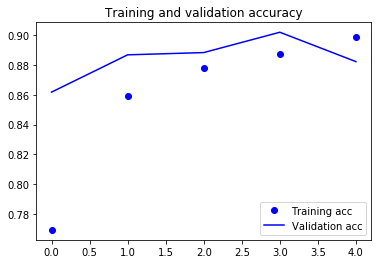

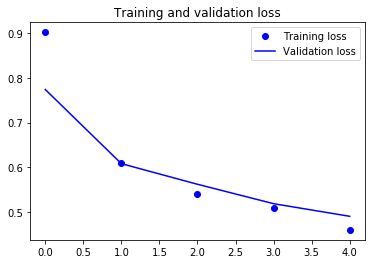

In [76]:
%matplotlib inline
from matplotlib import pyplot as plt

# add code here to visualize the accuracy and loss curves for both training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Here's some code you can use to try out example output of your model.

[0.19492675 0.80507326]
Neutral ----------------------------------------###---------- Smiling


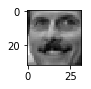

In [55]:
import numpy as np
def print_indicator(data, model, class_names, bar_width=50):
    plt.figure(figsize=(1,1))
    plt.imshow(255 * data[:,:,0],cmap='gray')
    probabilities = model.predict(np.array([data]))[0]
    print(probabilities)
    left_count = int(probabilities[1] * bar_width)
    right_count = bar_width - left_count
    left_side = '-' * left_count
    right_side = '-' * right_count
    print(class_names[0], left_side + '###' + right_side, class_names[1])

from matplotlib import pyplot as plt

img = X[7] #you can change this to see some other test examples.
print_indicator(img, model, ['Neutral', 'Smiling'])


Part 5. (20 points) Choose *one* of the three methods discussed in class for visualizing what your convnet learned (intermediate activations, filters, or heatmaps of class activation) to show which features it learned in order to do smile detection.

**Visualization: intermediate activations**

(1, 32, 32, 1)


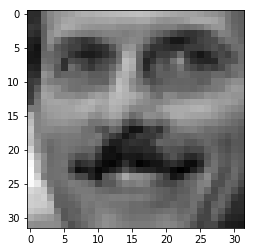

In [56]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


img = X[7] #--get image

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #--expand dimensions of image and add another column at the end(axis 0)
img_tensor /=255 #--normalizing the data

print(img_tensor.shape) #--get image shape

plt.imshow(255 * img[:,:,0],cmap='gray') 

In [57]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [58]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [59]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


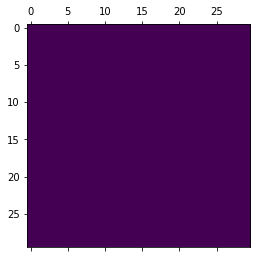

In [60]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

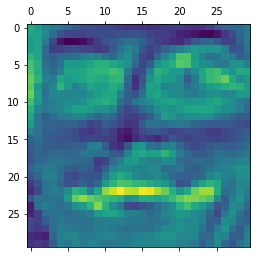

In [61]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


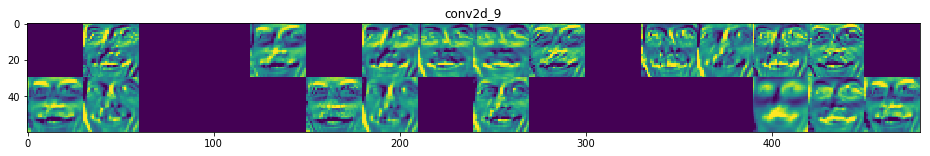

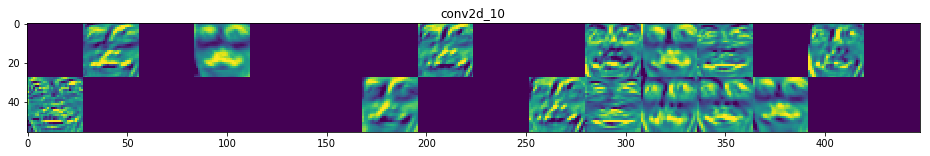

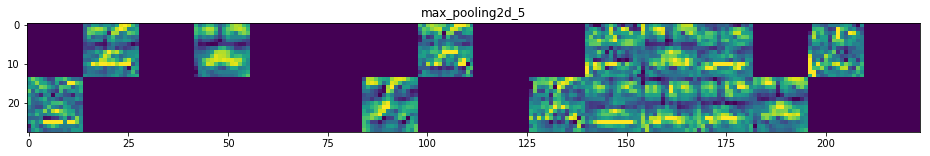

In [62]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()